In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BikeRent=pd.read_csv("BikeRentData.csv")
BikeRent.head()

,Unnamed: 0,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


The business meaning of each column in the data is as below

* season: The current season (1:winter, 2:spring, 3:summer, 4:fall)
* yr: year (0: 2011, 1:2012)
* mnth: month ( 1 to 12)
* hr: hour of the day (0 to 23)
* holiday: weather day is holiday or not
* weekday: day of the week
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0
* weathersit: The Weather forecast for the day
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: Normalized temperature in Celsius.
* atemp: Normalized feeling temperature in Celsius.
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [3]:
BikeRent.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
print(BikeRent.shape)
BikeRent.columns

(17379, 14)


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt'],
      dtype='object')

* Target : Cnt
* Predictors :'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered'

### Looking At Target Variable Distribution

<AxesSubplot:>

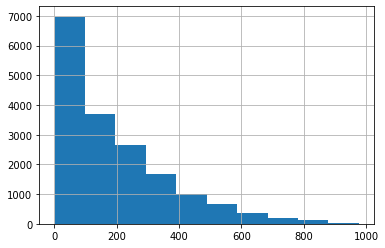

In [5]:
%matplotlib inline
BikeRent['cnt'].hist()

In [6]:
BikeRent['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [7]:
# q1=BikeRent['cnt'].quantile(0.25)
# q3=BikeRent['cnt'].quantile(0.75)
# iqr=q3-q1
# BikeRent[BikeRent['cnt']>(q1-1.5*iqr)]

### Data Exploration 
* Describe()
* Info()
* head()
* nuniques()

In [8]:
print(BikeRent.head(10),'\n')
print(BikeRent.info(),'\n',BikeRent.describe(),'\n',BikeRent.nunique(),sep='\n')

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   
5       1   0     1   5        0        6           0           2  0.24   
6       1   0     1   6        0        6           0           1  0.22   
7       1   0     1   7        0        6           0           1  0.20   
8       1   0     1   8        0        6           0           1  0.24   
9       1   0     1   9        0        6           0           1  0.32   

    atemp   hum  windspeed  registered  cnt  
0  0.2879  0.81     0.0000          13   16  
1  0.2727  0.80     0.0000          32   40  
2  0.2727  0.80     0.0000          

### Variables Analysis
* Qualitative:- yr <b>Rejected !</b>
* Categorical :- mnth holiday weekday workingday weathersit
* Continuous :- Temp,atemp,hum,windspeed,registered
* <b>Target</b>    :- cnt

In [4]:
#Removing Useless Column
BikeRent.drop('yr',axis=1,inplace=True)

### Univariate Analysis
* 1.Categorical Variables

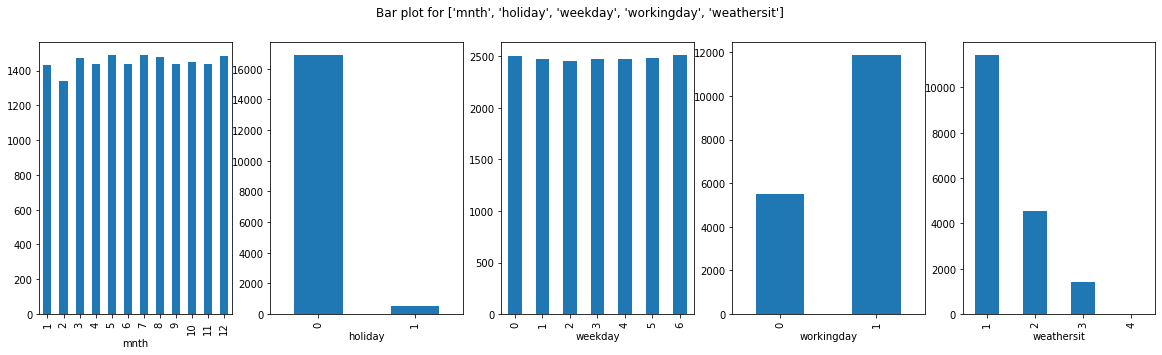

In [10]:
def plot_bar(df,cols):
    %matplotlib inline
    fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
    fig.suptitle("Bar plot for "+str(cols))
    
    for i,j in zip(cols,range(len(cols))):
        df.groupby(i).size().plot(kind='bar',ax=subplot[j])

categ=['mnth','holiday','weekday','workingday','weathersit']
plot_bar(BikeRent,categ)

* Continuous Variables

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

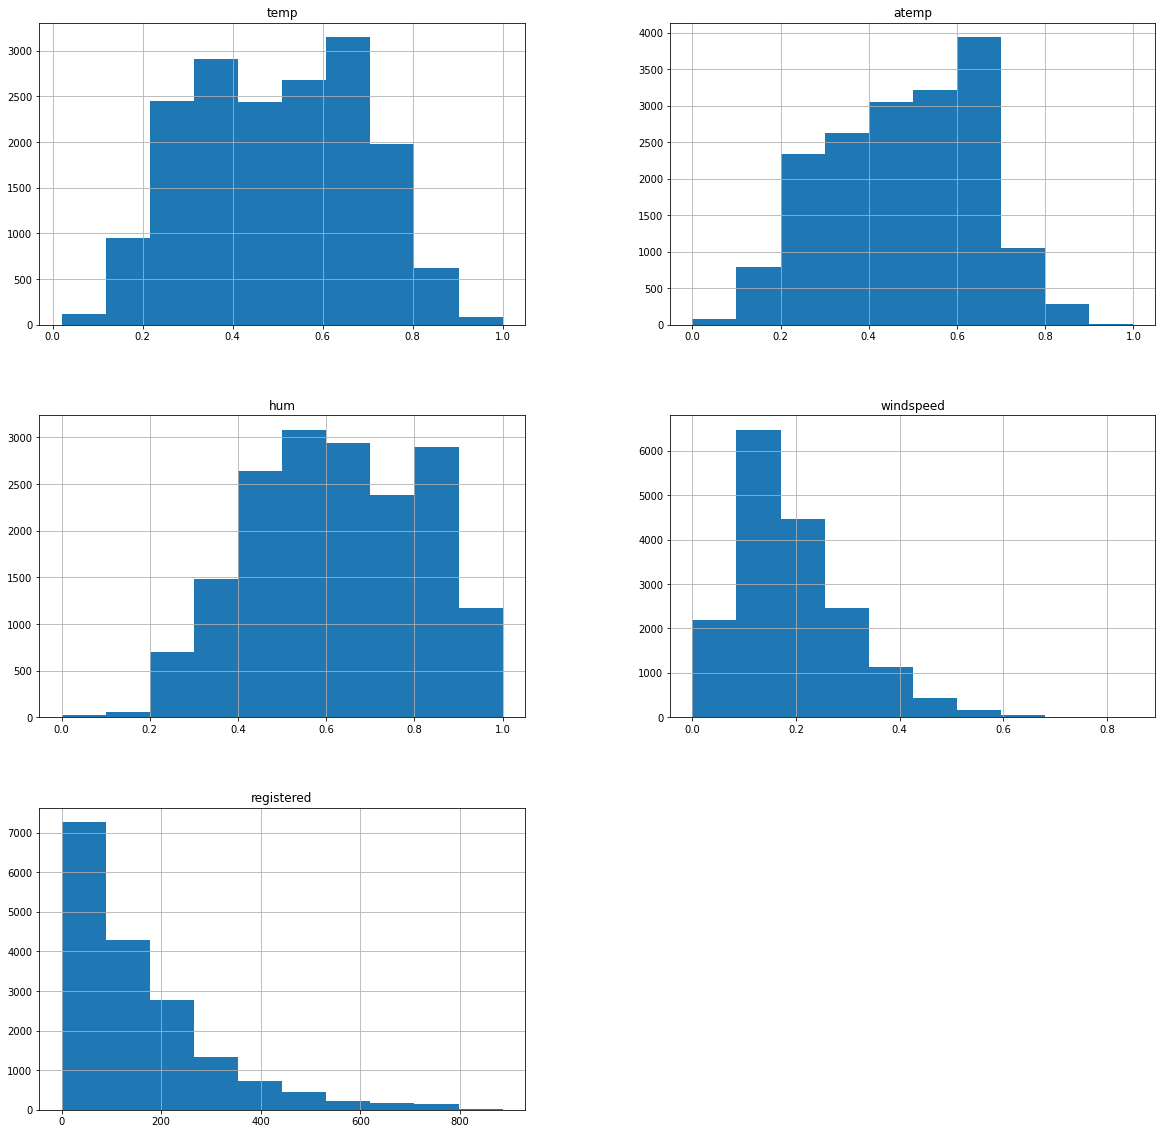

In [11]:

BikeRent.hist(['temp','atemp','hum','windspeed','registered'],figsize=(20,20),bins=10)

### Fetching Null Values

<AxesSubplot:>

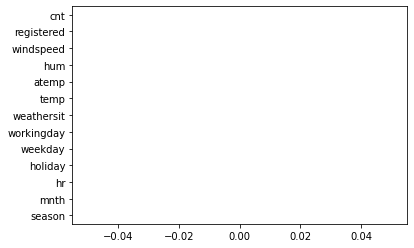

In [12]:
BikeRent.isnull().sum().plot(kind='barh')

### Bivariate Analysis
* Categorical vs continuous ['mnth','holiday','weekday','workingday','weathersit']  
* Continuous vs continuous ['temp','atemp','hum','windspeed','registered']

In [13]:
conti=['temp','atemp','hum','windspeed','registered']

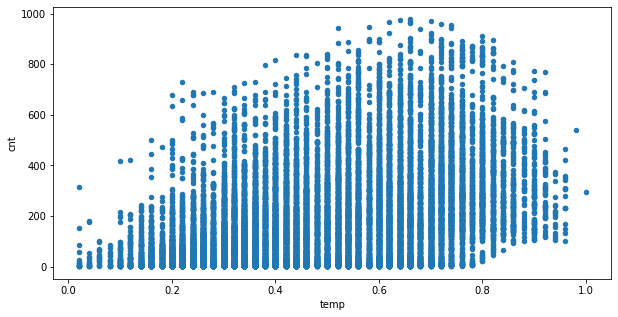

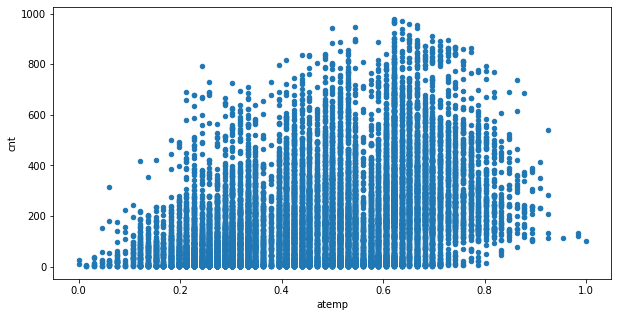

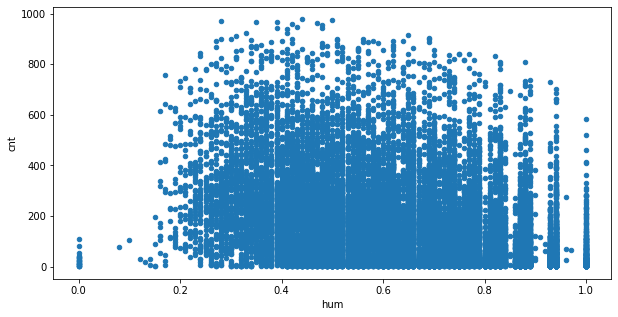

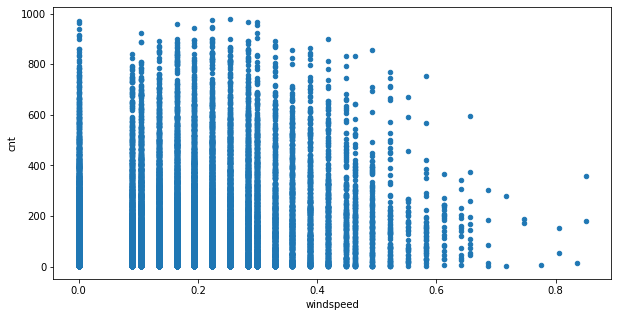

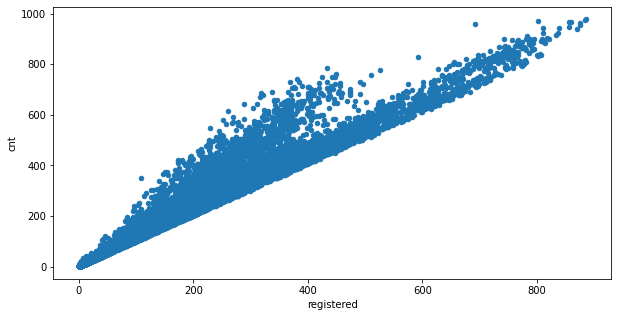

In [14]:
for i in conti:
    BikeRent.plot.scatter(x=i,y='cnt',figsize=(10,5))

In [15]:
BikeRent[['temp','atemp','hum','windspeed','registered','cnt']].corr()['cnt']

temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

* Selected Column <br>
  * 'registered'

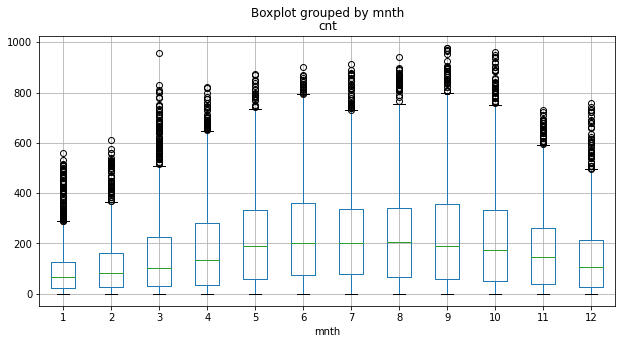

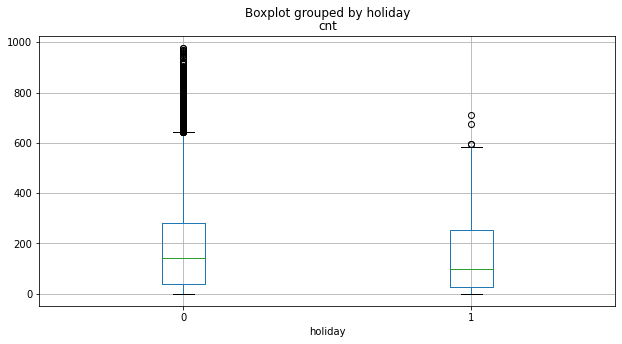

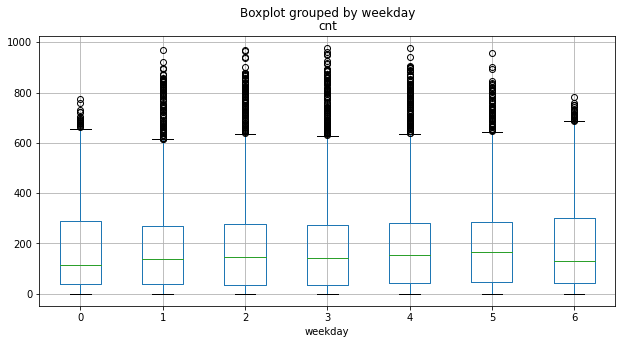

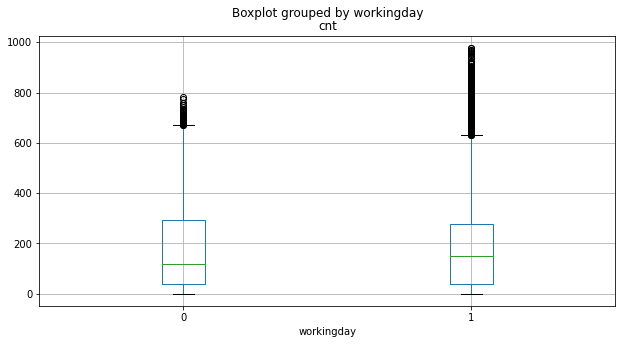

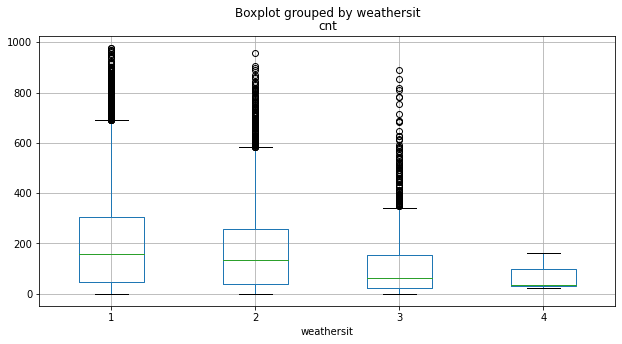

In [16]:
for i in categ:
    BikeRent.boxplot(column='cnt',by=i,figsize=(10,5))

In [17]:
# Annova Test

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [18]:
FunctionAnova(BikeRent,'cnt',categ)

##### ANOVA Results ##### 

mnth is correlated with cnt | P-Value: 5.505684936484358e-284
holiday is correlated with cnt | P-Value: 4.5461689487233316e-05
weekday is correlated with cnt | P-Value: 0.0018990310434750582
workingday is correlated with cnt | P-Value: 6.524264547051995e-05
weathersit is correlated with cnt | P-Value: 1.7347820521803117e-81


['mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Final selected Features
* Continuous :- 'registered'
* Categorical :- 'mnth','holiday','weekday','workingday','weathersit'

In [4]:
# Target := Cnt
# predictos := 'mnth','holiday','weekday','workingday','weathersit'

X=BikeRent[['mnth','holiday','weekday','workingday','weathersit','registered']].values
y=BikeRent['cnt'].values

### Standardization and Normalization of data <h4> (optional) Compulsary for KNN and Neural Networks


In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# mm=MinMaxScaler()
# Any one
ss=StandardScaler()
# X=mm.fit_transform(X)
X=ss.fit_transform(X)

### Splitting The Training and Testing data

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [22]:
np.set_printoptions(suppress=True)

### Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

print("Coef:-",LR.coef_,"\nIntercept",LR.intercept_)
from sklearn import metrics

print("R^2 Score id  :- ",metrics.r2_score(y_train,LR.predict(X_train)))

pred=LR.predict(X_test)


TestResult=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])
TestResult['cnt']=y_test
TestResult['cnt_predicted']=np.round(pred)
TestResult.head()
# APE 
APE=(abs(y_test-pred)/y_test)*100
# MAPE
MAPE=np.mean(APE)
# Median APE
MedAPE=np.median(APE)
TestResult['APE']=APE

print(TestResult[['cnt','cnt_predicted','APE']])

print("Mean Accuracy :-",(100-MAPE))
print("Median Accuracy :-",(100-MedAPE))

# Defining custom Scorer function
def Mape_scorer(origional,pred):
    ape=(abs(origional-pred)/origional)*100
    mape=np.mean(ape)
    return(100-mape)

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scorer=make_scorer(Mape_scorer,greater_is_better=True)

Cross_val=cross_val_score(LR,X,y,cv=10,scoring=scorer)

print("Results For Cross Validation :",Cross_val)
print("Final Average accuracy is :",round(np.mean(Cross_val),2))
print("Final Median Accuracy is :",round(np.median(Cross_val),2))


LinearRegression()

## Decision Trees 

In [13]:
from sklearn.tree import DecisionTreeRegressor


DT=DecisionTreeRegressor(max_depth=9,criterion='mae')
DT.fit(X_train,y_train)

pred2=DT.predict(X_test)

print("R2 score is ",metrics.r2_score(y_train,DT.predict(X_train)))

R2 score is  0.9846712331680721


In [14]:
#APE
APE=(abs(y_test-pred2)/y_test)*100
#MAPE
MAPE=np.mean(APE)
MedMAPE=np.median(APE)
MeanAccu=100-MAPE
MedAccu=100-MedMAPE
TestResult2=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])
TestResult2['cnt']=y_test
TestResult2['cnt_predicted']=np.round(pred2)
TestResult2['ape']=APE
print(TestResult2[['cnt','cnt_predicted','ape']],"\n Mean Accuracy is :",MeanAccu,"\n Median Accuracy is :",MedAccu)



      cnt  cnt_predicted        ape
0     134          159.0  18.656716
1     292          290.0   0.684932
2     284          309.0   8.802817
3      20           20.0   0.000000
4      92           95.0   3.260870
...   ...            ...        ...
5209  277          290.0   4.693141
5210  315          331.0   5.079365
5211  318          331.0   4.088050
5212  142          106.0  25.000000
5213  211          207.0   1.895735

[5214 rows x 3 columns] 
 Mean Accuracy is : 90.04090555562107 
 Median Accuracy is : 92.70966538789429


In [15]:
# plt.bar()

Scorer2=make_scorer(Mape_scorer,greater_is_better=True)
CV=cross_val_score(DT,X,y,scoring=Scorer2,cv=10)

print("Final Mean Accuracy is :- ",np.mean(CV))
print("Final Median Accuracy is :- ",np.median(CV))

KeyboardInterrupt: 

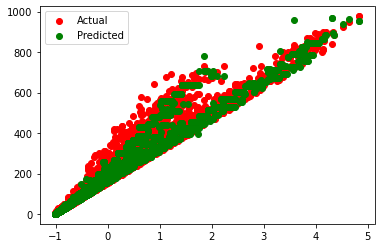

In [16]:
plt.scatter(x=TestResult2['registered'],y=y_test,color='red')

plt.scatter(x=TestResult2['registered'],y=pred2,color='green')
plt.legend(['Actual','Predicted'])



<AxesSubplot:>

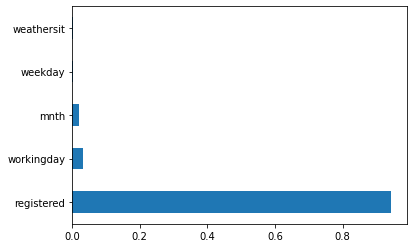

In [33]:
# Feature Importances
pd.Series(DT.feature_importances_,index=['mnth','holiday','weekday','workingday','weathersit','registered']).nlargest(5).plot(kind='barh')

#### Plotting Decision Tree

In [34]:
# pip install graphviz
# !pip install pydotplus

In [39]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=['mnth','holiday','weekday','workingday','weathersit','registered'], class_names='cnt')

# printing the rules
# print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=20000,height=20000)
# Double click on the graph to zoom in

In [44]:
tree=plt.gcf()
tree.savefig('biketree.png')

<Figure size 432x288 with 0 Axes>

### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor(n_estimators=100,max_depth=10,criterion='mae')
RFR.fit(X_train,y_train)

predRFR=RFR.predict(X_test)

resultsRFR=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])
resultsRFR['cnt_orig']=y_test
resultsRFR['cnt_predicted']=predRFR

resultsRFR['APE']=(abs(resultsRFR['cnt_orig']-resultsRFR['cnt_predicted'])/resultsRFR['cnt_orig'])*100

print(resultsRFR[['cnt_orig','cnt_predicted','APE']].head())

print("\n Average acuracy of Model is : ",100-resultsRFR['APE'].mean())

print("R2 Score of Fitted Model is : ",metrics.r2_score(y_test,predRFR))

def RFscorer(orig,pred):
    ape=(np.abs(orig-pred)/orig)*100
    return 100-np.mean(ape)

rfscorer=make_scorer(RFscorer)

cv=cross_val_score(RFR,X,y,cv=10,scoring=rfscorer)

print(cv)
print("Final Average Accuracy of Model is ",np.mean(cv))

   cnt_orig  cnt_predicted        APE
0       134        164.210  22.544776
1       292        275.545   5.635274
2       284        310.140   9.204225
3        20         20.285   1.425000
4        92        101.195   9.994565

 Average acuracy of Model is :  90.46291641533665
R2 Score of Fitted Model is :  0.9828194569294204


KeyboardInterrupt: 

### AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostRegressor

DTADA=DecisionTreeRegressor(max_depth=10,criterion='mse')
ADA=AdaBoostRegressor(base_estimator=DTADA,n_estimators=100,learning_rate=0.02,random_state=3)

ADA.fit(X_train,y_train)

predADA=ADA.predict(X_test)

resultsADA=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])
resultsADA['cnt_orig']=y_test
resultsADA['cnt_pred']=predADA

resultsADA['APE']=(abs(resultsADA['cnt_orig']-resultsADA['cnt_pred'])/resultsADA['cnt_orig'])*100

print(resultsADA[['cnt_orig','cnt_pred','APE']])
print("\nR2 Score of Fitted model is : ",metrics.r2_score(y_test,predADA))
print("Average Accuracy of Model MAPE is :",100-np.mean(resultsADA['APE']))


def adaScore(orig,pred):
    ape=(abs(orig-pred)/orig)*100
    return 100-np.mean(ape)

scorerADA=make_scorer(adaScore)


cv=cross_val_score(ADA,X,y,cv=10,scoring=scorerADA)

print(cv)
print("Final Average accuracy of Model : ",round(np.mean(cv),4))

      cnt_orig    cnt_pred        APE
0          134  170.032258  26.889745
1          292  280.809917   3.832220
2          284  308.771429   8.722334
3           20   22.000000  10.000000
4           92  104.965517  14.092954
...        ...         ...        ...
5209       277  290.670000   4.935018
5210       315  331.058824   5.098039
5211       318  325.209302   2.267076
5212       142   96.454545  32.074264
5213       211  224.681818   6.484274

[5214 rows x 3 columns]

R2 Score of Fitted model is :  0.9830468300921742
Average Accuracy of Model MAPE is : 89.70382086136048
[88.38080352 87.11921583 89.24969521 89.37217216 88.48239898 87.00375126
 87.01564827 89.70412873 89.27726756 88.70272244]
Final Average accuracy of Model :  88.4308


<AxesSubplot:>

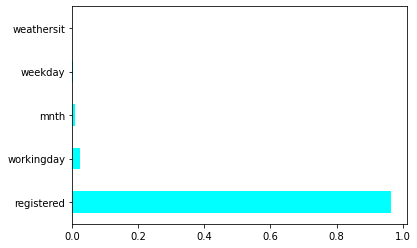

In [56]:
features=pd.Series(ADA.feature_importances_,index=['mnth','holiday','weekday','workingday','weathersit','registered'])
features.nlargest(5).plot(kind='barh',color='cyan')

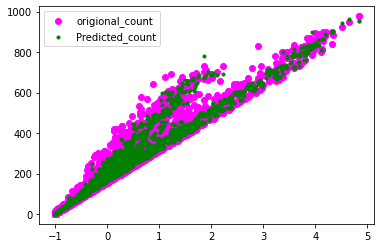

In [72]:
plt.scatter(x=resultsADA['registered'],y=resultsADA['cnt_orig'],color='magenta')
plt.scatter(x=resultsADA['registered'],y=resultsADA['cnt_pred'],color='green',marker='.')
plt.legend(['origional_count','Predicted_count'])

### XGBoost

In [98]:
from xgboost import XGBRegressor

XGB=XGBRegressor(n_estimators=150,learning_rate=0.1,objective='reg:squarederror',max_depth=7,booster='gbtree',random_state=3)
XGB.fit(X_train,y_train)

predXGB=XGB.predict(X_test)

resultsXGB=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])

resultsXGB['orig_cnt']=y_test
resultsXGB['pred_cnt']=predXGB
resultsXGB['APE']=(abs(resultsXGB['orig_cnt']-resultsXGB['pred_cnt'])/resultsXGB['orig_cnt'])*100

print(resultsXGB[['orig_cnt','pred_cnt','APE']])
print("R2 score of Fitted Model is :",metrics.r2_score(y_test,predXGB))
print("Average Accuracy on test data : ",100-np.mean(resultsXGB['APE']))

cv=cross_val_score(XGB,X,y,cv=10,scoring=scorerADA)

print(cv)
print("Final Average Accuracy on Test Data : ",np.mean(cv))

      orig_cnt    pred_cnt        APE
0          134  166.630341  24.351000
1          292  273.540070   6.321894
2          284  302.435272   6.491293
3           20   22.141342  10.706711
4           92  100.010803   8.707395
...        ...         ...        ...
5209       277  286.824432   3.546726
5210       315  333.640991   5.917775
5211       318  320.134888   0.671348
5212       142  102.211136  28.020327
5213       211  222.571045   5.483908

[5214 rows x 3 columns]
R2 score of Fitted Model is : 0.984047350752221
Average Accuracy on test data :  89.707310014887
[89.05000826 86.32255793 89.03711654 89.25311983 89.45806103 87.92769741
 85.891336   88.49190818 89.24483519 89.21037918]
Final Average Accuracy on Test Data :  88.38870195303926


<AxesSubplot:>

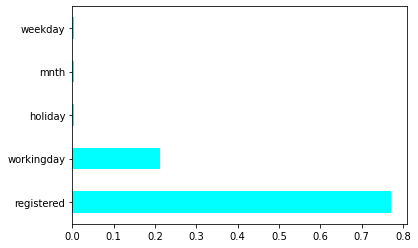

In [114]:
features=pd.Series(XGB.feature_importances_,index=['mnth','holiday','weekday','workingday','weathersit','registered'])
features.nlargest(5).plot(kind='barh',color='cyan')

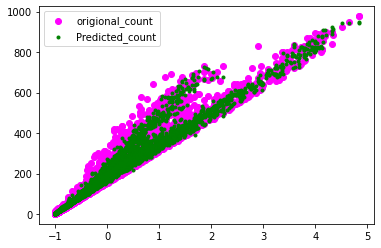

In [117]:
plt.scatter(x=resultsXGB['registered'],y=resultsXGB['orig_cnt'],color='magenta')
plt.scatter(x=resultsXGB['registered'],y=resultsXGB['pred_cnt'],color='green',marker='.')
plt.legend(['origional_count','Predicted_count'])

### KNN

In [113]:
from sklearn.neighbors import KNeighborsRegressor

KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train,y_train)

predKNN=KNN.predict(X_test)

resultsKNN=pd.DataFrame(X_test,columns=['mnth','holiday','weekday','workingday','weathersit','registered'])

resultsKNN['orig_cnt']=y_test
resultsKNN['pred_cnt']=predKNN
resultsKNN['APE']=(abs(resultsKNN['orig_cnt']-resultsKNN['pred_cnt'])/resultsKNN['orig_cnt'])*100

print(resultsKNN[['orig_cnt','pred_cnt','APE']])
print("R2 score of Fitted Model is :",metrics.r2_score(y_test,predKNN))
print("Average Accuracy on test data : ",100-np.mean(resultsKNN['APE']))

cv=cross_val_score(XGB,X,y,cv=10,scoring=scorerADA)

print(cv)
print("Final Average Accuracy on Test Data : ",np.mean(cv))


      orig_cnt  pred_cnt        APE
0          134     183.5  36.940299
1          292     265.5   9.075342
2          284     329.0  15.845070
3           20      23.5  17.500000
4           92      97.5   5.978261
...        ...       ...        ...
5209       277     299.0   7.942238
5210       315     346.5  10.000000
5211       318     349.0   9.748428
5212       142     116.0  18.309859
5213       211     214.0   1.421801

[5214 rows x 3 columns]
R2 score of Fitted Model is : 0.9742889899425062
Average Accuracy on test data :  83.5952272287536
[89.05000826 86.32255793 89.03711654 89.25311983 89.45806103 87.92769741
 85.891336   88.49190818 89.24483519 89.21037918]
Final Average Accuracy on Test Data :  88.38870195303926


array([[ 1.    ,  1.    ,  0.    , ...,  0.81  ,  0.    , 13.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.8   ,  0.    , 32.    ],
       [ 1.    ,  1.    ,  2.    , ...,  0.8   ,  0.    , 27.    ],
       ...,
       [ 1.    , 12.    , 21.    , ...,  0.6   ,  0.1642, 83.    ],
       [ 1.    , 12.    , 22.    , ...,  0.56  ,  0.1343, 48.    ],
       [ 1.    , 12.    , 23.    , ...,  0.65  ,  0.1343, 37.    ]])

### Applying Dimension reduction techniques PCA

In [10]:
from sklearn.decomposition import PCA

pca=PCA(n_components=BikeRent.shape[1]-1)

pca.fit_transform(BikeRent.drop('cnt',axis=1).values)
explained_variance=pca.explained_variance_ratio_

explained_variance=np.cumsum(explained_variance)*100
explained_variance

array([ 99.74443956,  99.92363782,  99.97774335,  99.99524593,
        99.99703588,  99.99856246,  99.99948405,  99.99971359,
        99.99983419,  99.99994555,  99.99999836, 100.        ])

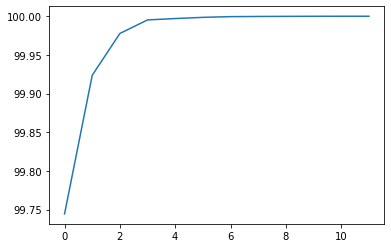

In [11]:
plt.plot(explained_variance)

In [16]:
# generating 3 pca components

pca=PCA(n_components=3)
pca_comp=pca.fit_transform(BikeRent.drop('cnt',axis=1).values)
X=pca_comp
y=BikeRent['cnt'].values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# mm=MinMaxScaler()
# Any one
ss=StandardScaler()
# X=mm.fit_transform(X)
X=ss.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Multiple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

print("Coef:-",LR.coef_,"\nIntercept",LR.intercept_)
from sklearn import metrics

print("R^2 Score id  :- ",metrics.r2_score(y_train,LR.predict(X_train)))

pred=LR.predict(X_test)



# APE 
APE=(abs(y_test-pred)/y_test)*100
# MAPE
MAPE=np.mean(APE)
# Median APE
MedAPE=np.median(APE)



print("Mean Accuracy :-",(100-MAPE))
print("Median Accuracy :-",(100-MedAPE))

# Defining custom Scorer function
def Mape_scorer(origional,pred):
    ape=(abs(origional-pred)/origional)*100
    mape=np.mean(ape)
    return(100-mape)

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scorer=make_scorer(Mape_scorer,greater_is_better=True)

Cross_val=cross_val_score(LR,X,y,cv=10,scoring=scorer)

print("Results For Cross Validation :",Cross_val)
print("Final Average accuracy is :",round(np.mean(Cross_val),2))
print("Final Median Accuracy is :",round(np.median(Cross_val),2))


Coef:- [176.51496002  -6.00278378  -1.05333491] 
Intercept 189.58702810892424
R^2 Score id  :-  0.9455352310412992
Mean Accuracy :- 69.6269555935936
Median Accuracy :- 85.05651620832981
Results For Cross Validation : [-11.48485578  71.48556111  80.58682964  74.83598308  32.03992131
  25.66824293  77.93141574  82.50083453  82.63636424  51.88400109]
Final Average accuracy is : 56.81
Final Median Accuracy is : 73.16
